地震に焦点を当てることにしました。

地震は気象災害とは異なり、突発的で、長期的に見ればほぼ一定であると言えます。

抽出された地震関連災害のデータ件数: 1624


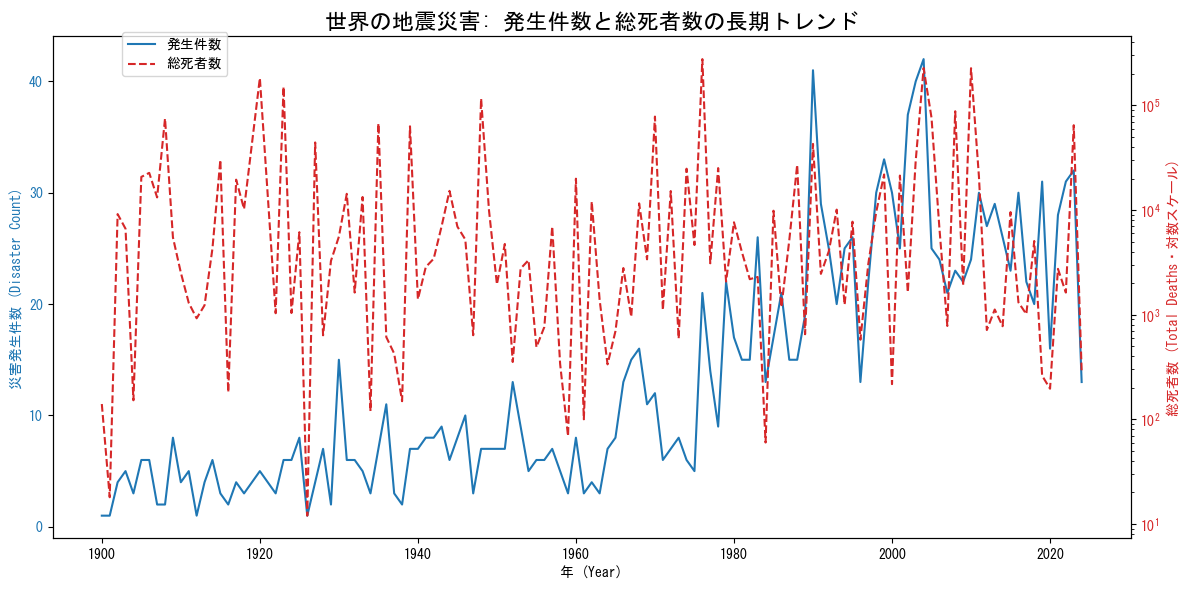

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rc('font', family='MS Gothic')


df = pd.read_csv('emdat.csv')

earthquake_df = df[df['Disaster Type'].isin(['Earthquake', 'Tsunami', 'Earthquake (seismic activity)'])].copy()


earthquake_df['Total Deaths'] = earthquake_df['Total Deaths'].fillna(0).astype(int)

print(f"抽出された地震関連災害のデータ件数: {len(earthquake_df)}")


trend_df = earthquake_df.groupby('Start Year').agg(
    Disaster_Count=('Disaster Type', 'size'),
    Total_Deaths=('Total Deaths', 'sum')
).reset_index()


fig, ax1 = plt.subplots(figsize=(12, 6))


color = 'tab:blue'
ax1.set_xlabel('年 (Year)')
ax1.set_ylabel('災害発生件数 (Disaster Count)', color=color)
ax1.plot(trend_df['Start Year'], trend_df['Disaster_Count'], color=color, label='発生件数')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('総死者数 (Total Deaths・対数スケール)', color=color)
ax2.plot(trend_df[trend_df['Total_Deaths'] > 0]['Start Year'], 
         trend_df[trend_df['Total_Deaths'] > 0]['Total_Deaths'], 
         color=color, linestyle='--', label='総死者数')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yscale('log')

plt.title('世界の地震災害: 発生件数と総死者数の長期トレンド', fontsize=16)
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.95))
fig.tight_layout()
plt.show()



ここから、発生件数は比較的安定しているのに対し、死者数が不安定なことがうかがえます。

## 人的被害（総死者数）トップ10
       Start Year       Country  Total Deaths Disaster Type
438        1976.0         China        242000    Earthquake
2557       2010.0         Haiti        222570    Earthquake
361        1920.0         China        180000    Earthquake
3931       2004.0     Indonesia        165708    Earthquake
6715       1923.0         Japan        143000    Earthquake
12679      1948.0  Soviet Union        110000    Earthquake
689        2008.0         China         87476    Earthquake
5989       1908.0         Italy         75000    Earthquake
9363       2005.0      Pakistan         73338    Earthquake
10501      1970.0          Peru         66794    Earthquake


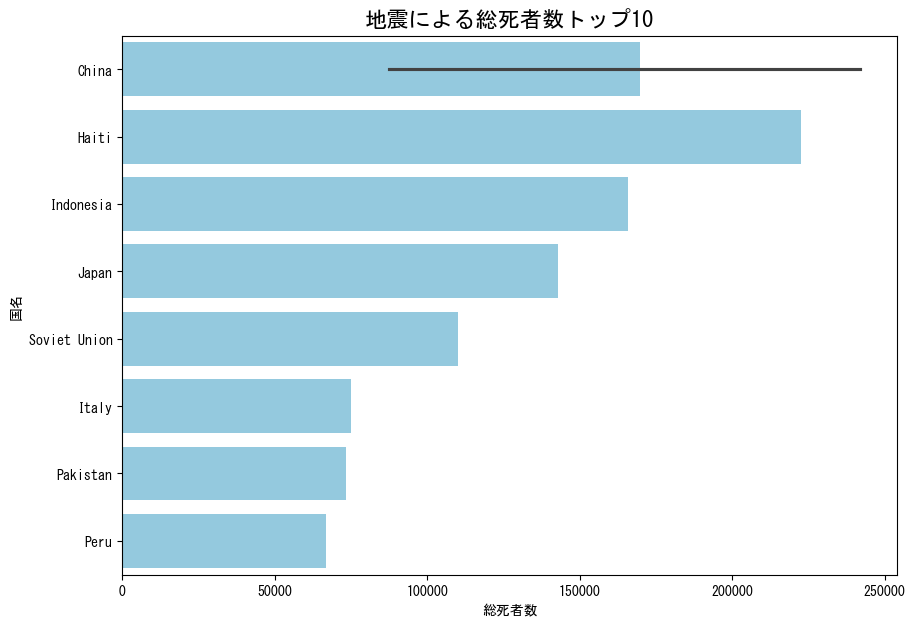

In [13]:
top_deaths = earthquake_df.nlargest(10, 'Total Deaths')[['Start Year', 'Country', 'Total Deaths', 'Disaster Type']].copy()

print("## 人的被害（総死者数）トップ10")
print(top_deaths.sort_values('Total Deaths', ascending=False))

plt.figure(figsize=(10, 7))
sns.barplot(
    data=top_deaths.sort_values('Total Deaths', ascending=False),
    y='Country', x='Total Deaths', color='skyblue'
)
plt.title('地震による総死者数トップ10', fontsize=16)
plt.xlabel('総死者数')
plt.ylabel('国名')
plt.show()




死者数トップのリストには発展途上国が多く含まれています。ここから、地震の脅威よりも建物の脆弱性が死者数を左右していることがわかります。


## アジア地域における地震1件あたりの平均死者数比較
                Era  Total Deaths
0  1970-1999 (古い時代)   2599.600467
1   2000-現在 (新しい時代)   1839.960133


C:\Users\07aat\AppData\Local\Temp\ipykernel_10992\2308484358.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


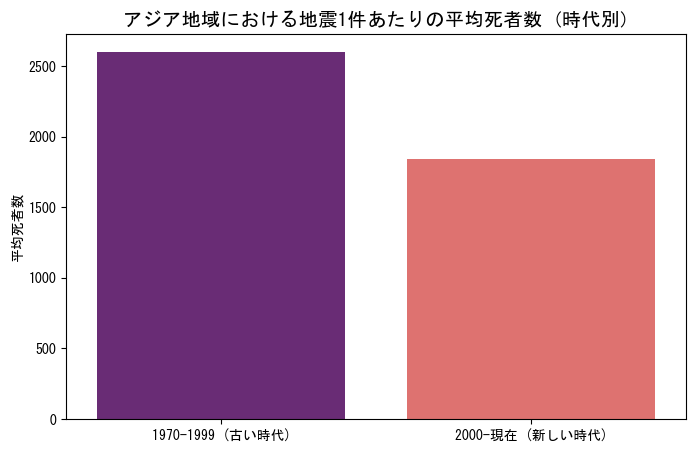

In [16]:
asia_earthquakes = earthquake_df[earthquake_df['Region'] == 'Asia'].copy()

asia_earthquakes['Era'] = np.where(asia_earthquakes['Start Year'] < 2000, '1970-1999 (古い時代)', '2000-現在 (新しい時代)')

avg_deaths_per_event = asia_earthquakes[asia_earthquakes['Total Deaths'] > 0].groupby('Era')['Total Deaths'].mean().reset_index()

print("\n## アジア地域における地震1件あたりの平均死者数比較")
print(avg_deaths_per_event)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=avg_deaths_per_event,
    x='Era', y='Total Deaths', palette='magma'
)
plt.title('アジア地域における地震1件あたりの平均死者数 (時代別)', fontsize=14)
plt.ylabel('平均死者数')
plt.xlabel('')
plt.show()

old_avg = avg_deaths_per_event[avg_deaths_per_event['Era'] == '1970-1999 (古い時代)']['Total Deaths'].iloc[0]
new_avg = avg_deaths_per_event[avg_deaths_per_event['Era'] == '2000-現在 (新しい時代)']['Total Deaths'].iloc[0]


1970-1999年：約2,600人

2000-現在　：訳1,800人

平均死者数は減少傾向にあり、「防犯対策」と「投資」が人命救助に効果をもたらしている間接的な証拠になります。

この分析から、

・地震は発生件数は安定しているにもかかわらず、「突発的かつ壊滅的」な特徴を持っていること

・人的被害が多い原因の一つに建物の耐震性や救助体制が不十分なこと

・自身の強弱よりも「釈迦経済的な脆弱性」が総死者数を増やしていること

・地震の多いアジア地域では新しい時代の方が平均死者数が減少傾向にあること

・長期にわたる「減殺・防災への投資」が死者数を減らすのに有効であること

　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　がわかります

まとめ

総死者数をさらに減らすためには、特に脆弱な地域の地震多発地帯における「耐震技術の普及と国際的な支援」が不可欠です。
データに基づき、災害リスク管理と早期警戒システムの整備を継続することが、今後の大地震に備えるための最も重要な事柄だと言っても過言ではないと思います。